### Los datos están ordenados de la siguiente manera: {Hora UTC de la medición, azimut de la fuente, elevación de la fuente, 0, 0, Frecuencia Inicial en MHz, Tamaño del canal espectral en MHz, 1, Número de canales (64), 64 valores de temperatura de antena para cada canal espectral}. En total 73 columnas

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#datos, los 64 valores de temperatura
data = np.genfromtxt('interferometria.rad', comments='*')[:,9:] #devuelve un arreglo de arreglos de la columna 9 en adelante

#ascension y elevacion (primera y segunda columna)
a, e = np.loadtxt('interferometria.rad',comments='*',usecols=(1,2),unpack=True)
a=a*np.pi/180; e=e*np.pi/180

In [3]:
e[1]

1.1187560505283651

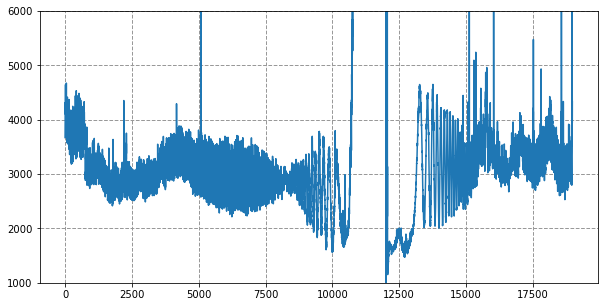

In [4]:
#Promediando para obtener mediciones de continuo
plt.rcParams["figure.figsize"] = (10,5)


largo=len(data)
data_mean=[]

for espectro in data:
    data_mean.append(np.mean(espectro))
    
fig=plt.figure()
plt.plot(np.arange(len(data_mean)),data_mean)
plt.ylim(1000,6000)

plt.grid(True)
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.show()


## Separar datos de la mañana con datos de la tarde

Tarde


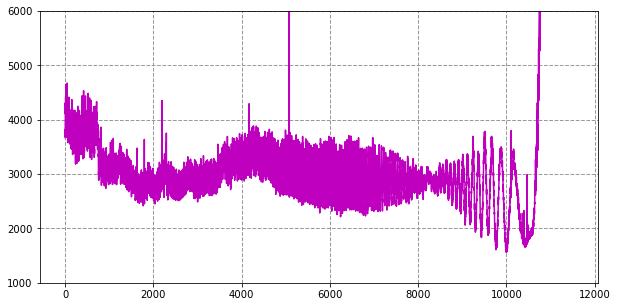

Mañana


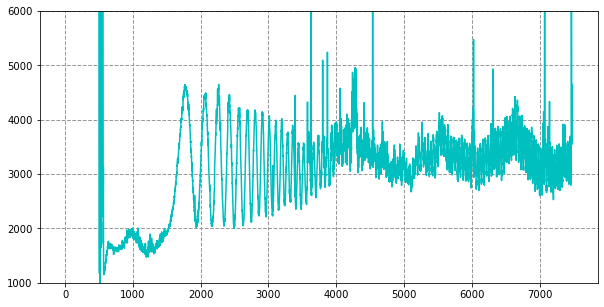

In [5]:
#Separar mañana y tarde 
data_t=data_mean[:11496] #tarde
data_m=data_mean[11497:] #mañana

print ('Tarde')

plt.ylim(1000,6000)
plt.grid(True)
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(np.arange(len(data_t)),data_t, c='m')
plt.show()

print ('Mañana')

plt.ylim(1000,6000)
plt.grid(True)
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.plot(np.arange(len(data_m)), data_m, c='c')
plt.show()



### Limpiar datos

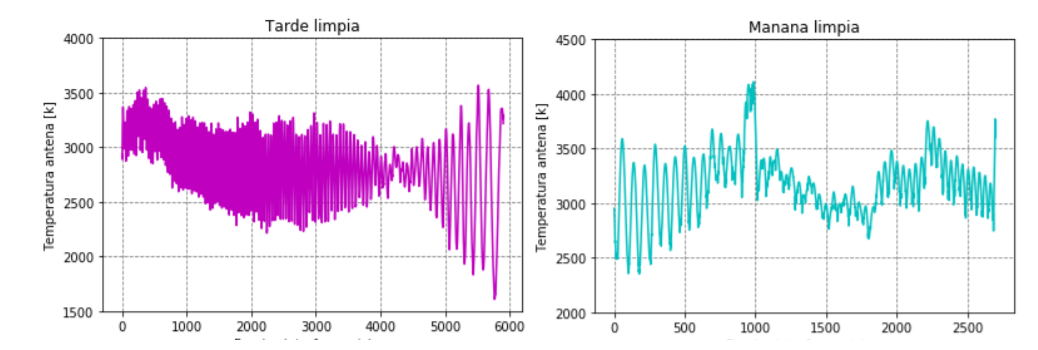

## Para hacer transformada de Fourier se ocupa la transformada de Fourier discreta de Numpy

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

Tarde


C:\Users\silva\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


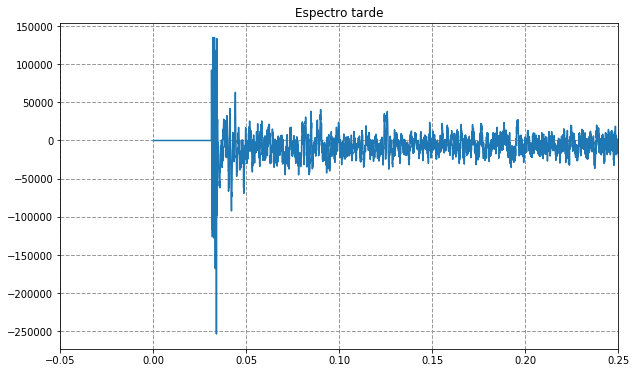

manana


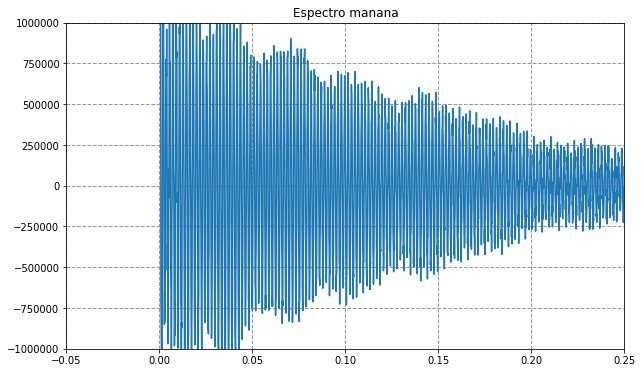

In [5]:
## EJEMPLO DE FFT (con datos crudos)

#tarde
esp_t=np.fft.rfft(data_t)
f_t=np.fft.rfftfreq(len(data_t))
#mañana
esp_m=np.fft.rfft(data_m)
f_m=np.fft.rfftfreq(len(data_m))

plt.rcParams["figure.figsize"] = (10,6)

for i in range(360):
    esp_t[i]=0

    
print ('Tarde')
plt.plot(f_t,esp_t)
plt.title('Espectro tarde')
plt.xlim(-.05,0.25)
#plt.ylim(-100000,100000)
plt.grid(True)
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.show()

fig=plt.figure()

print ('manana')
plt.plot(f_m,esp_m)
plt.title('Espectro manana')
plt.xlim(-0.05,0.25)
plt.ylim(-1000000,1000000)
plt.grid(True)
plt.grid(color = '0.6', linestyle = '--', linewidth = 1)
plt.show()


#Antitransformada es np.fft.ifft